<a href="https://colab.research.google.com/github/wanjanhasan/non-obviousEmotionDetction/blob/main/non-obviousEmotionEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Initializing and Loading Data

###Importing necessary libraries

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

###Loading Data

In [153]:
semeval = pd.read_csv('/content/SemEval2022_En.csv')
tweet = pd.read_csv('/content/tweet_emotions.csv')
liar=pd.read_csv('/content/train.tsv', sep='\t')

##Data Understanding

###Peeking into the datasets (First 5 of each)

In [154]:
semeval.head(5)

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0
4,4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0


In [155]:
tweet.head(5)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [156]:
liar.head(5)

,2635.json,false,Says the Annies List political group supports third-trimester abortions on demand.,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0.1,0.2,0.3,a mailer
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


###Length of each dataset

In [157]:
print('SemEval2022_En Dataset length: {}'.format(len(semeval)))
print('tweet_emotions Dataset length: {}'.format(len(tweet)))
print('liar_train Dataset length: {}'.format(len(liar)))

SemEval2022_En Dataset length: 3468
tweet_emotions Dataset length: 40000
liar_train Dataset length: 10239


###Shape of each dataset

In [158]:
print('SemEval2022_En Dataset shape: {}'.format(semeval.shape))
print('tweet_emotions Dataset shape: {}'.format(tweet.shape))
print('liar_train Dataset shape: {}'.format(liar.shape))

SemEval2022_En Dataset shape: (3468, 10)
tweet_emotions Dataset shape: (40000, 3)
liar_train Dataset shape: (10239, 14)


###All the columns in each dataset

In [159]:
print('SemEval2022_En Dataset columns: {}'.format(semeval.columns))

SemEval2022_En Dataset columns: Index(['Unnamed: 0', 'tweet', 'sarcastic', 'rephrase', 'sarcasm', 'irony',
       'satire', 'understatement', 'overstatement', 'rhetorical_question'],
      dtype='object')


In [160]:
print('tweet_emotions Dataset columns: {}'.format(tweet.columns))

tweet_emotions Dataset columns: Index(['tweet_id', 'sentiment', 'content'], dtype='object')


In [161]:
print('liar_train Dataset columns: {}'.format(liar.columns))

liar_train Dataset columns: Index(['2635.json', 'false',
       'Says the Annies List political group supports third-trimester abortions on demand.',
       'abortion', 'dwayne-bohac', 'State representative', 'Texas',
       'republican', '0', '1', '0.1', '0.2', '0.3', 'a mailer'],
      dtype='object')


In [162]:
semeval.dtypes

Unnamed: 0               int64
tweet                   object
sarcastic                int64
rephrase                object
sarcasm                float64
irony                  float64
satire                 float64
understatement         float64
overstatement          float64
rhetorical_question    float64
dtype: object

In [163]:
tweet.dtypes

tweet_id      int64
sentiment    object
content      object
dtype: object

####LIAR: A BENCHMARK DATASET FOR FAKE NEWS DETECTION

William Yang Wang, "Liar, Liar Pants on Fire": A New Benchmark Dataset for Fake News Detection, to appear in Proceedings of the 55th Annual Meeting of the Association for Computational Linguistics (ACL 2017), short paper, Vancouver, BC, Canada, July 30-August 4, ACL.
=====================================================================
Description of the TSV format:

Column 1: the ID of the statement ([ID].json).
Column 2: the label.
Column 3: the statement.
Column 4: the subject(s).
Column 5: the speaker.
Column 6: the speaker's job title.
Column 7: the state info.
Column 8: the party affiliation.
Column 9-13: the total credit history count, including the current statement.
9: barely true counts.
10: false counts.
11: half true counts.
12: mostly true counts.
13: pants on fire counts.
Column 14: the context (venue / location of the speech or statement).

Note that we do not provide the full-text verdict report in this current version of the dataset,
but you can use the following command to access the full verdict report and links to the source documents:
wget http://www.politifact.com//api/v/2/statement/[ID]/?format=json

======================================================================
The original sources retain the copyright of the data.

Note that there are absolutely no guarantees with this data,
and we provide this dataset "as is",
but you are welcome to report the issues of the preliminary version
of this data.

You are allowed to use this dataset for research purposes only.

For more question about the dataset, please contact:
William Wang, william@cs.ucsb.edu


In [164]:
liar.dtypes

2635.json                                                                              object
false                                                                                  object
Says the Annies List political group supports third-trimester abortions on demand.     object
abortion                                                                               object
dwayne-bohac                                                                           object
State representative                                                                   object
Texas                                                                                  object
republican                                                                             object
0                                                                                     float64
1                                                                                     float64
0.1                                                         

###Important features of each dataset

In [165]:
semeval.describe()

,Unnamed: 0,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
count,3468.000000,3468.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,1733.500000,0.250000,0.822376,0.178777,0.028835,0.011534,0.046136,0.116494
std,1001.269694,0.433075,0.382417,0.383387,0.167439,0.106837,0.209901,0.321001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,866.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1733.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2600.250000,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3467.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [166]:
tweet.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [167]:
liar.describe()

,0,1,0.1,0.2,0.3
count,10237.000000,10237.000000,10237.000000,10237.000000,10237.000000
mean,11.534336,13.287682,17.135391,16.435870,6.202012
std,18.974349,24.113808,35.847862,36.153089,16.129599
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,3.000000,3.000000,1.000000
75%,12.000000,12.000000,13.000000,11.000000,5.000000
max,70.000000,114.000000,160.000000,163.000000,105.000000


###Sum of occurances where each column has null value

In [168]:
semeval.isna().sum()

Unnamed: 0                0
tweet                     1
sarcastic                 0
rephrase               2601
sarcasm                2601
irony                  2601
satire                 2601
understatement         2601
overstatement          2601
rhetorical_question    2601
dtype: int64

In [169]:
tweet.isna().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [170]:
liar.isna().sum()

2635.json                                                                                0
false                                                                                    0
Says the Annies List political group supports third-trimester abortions on demand.       0
abortion                                                                                 2
dwayne-bohac                                                                             2
State representative                                                                  2897
Texas                                                                                 2208
republican                                                                               2
0                                                                                        2
1                                                                                        2
0.1                                                                                      2

###Unique values for chcking sentiment/sarcasm/lie columns

####SemEval Dataset

In [171]:
semeval.columns

Index(['Unnamed: 0', 'tweet', 'sarcastic', 'rephrase', 'sarcasm', 'irony',
       'satire', 'understatement', 'overstatement', 'rhetorical_question'],
      dtype='object')

In [172]:
semeval['sarcastic'].value_counts()

0    2601
1     867
Name: sarcastic, dtype: int64

In [173]:
semeval['irony'].value_counts()

0.0    712
1.0    155
Name: irony, dtype: int64

In [174]:
semeval['satire'].value_counts()

0.0    842
1.0     25
Name: satire, dtype: int64

In [175]:
semeval['understatement'].value_counts()

0.0    857
1.0     10
Name: understatement, dtype: int64

In [176]:
semeval['overstatement'].value_counts()

0.0    827
1.0     40
Name: overstatement, dtype: int64

In [177]:
semeval['rhetorical_question'].value_counts()

0.0    766
1.0    101
Name: rhetorical_question, dtype: int64

In [178]:
semeval['sarcasm'].value_counts()

1.0    713
0.0    154
Name: sarcasm, dtype: int64

####Tweet_emotions Dataset

In [179]:
tweet.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

In [180]:
tweet['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

####Liar Dataset
Column 1: the ID of the statement ([ID].json).
Column 2: the label.
Column 3: the statement.
Column 4: the subject(s).
Column 5: the speaker.
Column 6: the speaker's job title.
Column 7: the state info.
Column 8: the party affiliation.
Column 9-13: the total credit history count, including the current statement.
9: barely true counts.
10: false counts.
11: half true counts.
12: mostly true counts.
13: pants on fire counts.
Column 14: the context (venue / location of the speech or statement).

In [181]:
liar.columns

Index(['2635.json', 'false',
       'Says the Annies List political group supports third-trimester abortions on demand.',
       'abortion', 'dwayne-bohac', 'State representative', 'Texas',
       'republican', '0', '1', '0.1', '0.2', '0.3', 'a mailer'],
      dtype='object')

In [182]:
liar['republican'].value_counts()

republican                      4496
democrat                        3336
none                            1744
organization                     219
independent                      147
newsmaker                         56
libertarian                       40
activist                          39
journalist                        38
columnist                         35
talk-show-host                    26
state-official                    20
labor-leader                      11
tea-party-member                  10
business-leader                    9
green                              3
education-official                 2
liberal-party-canada               1
government-body                    1
Moderate                           1
democratic-farmer-labor            1
ocean-state-tea-party-action       1
constitution-party                 1
Name: republican, dtype: int64

In [183]:
liar['republican'].isna().sum()

2

In [184]:
liar['false'].value_counts()

half-true      2114
false          1994
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: false, dtype: int64

In [185]:
pd.set_option('display.max_rows', 500)

In [186]:
liar['Texas'].value_counts()

Texas                                                1008
Florida                                               997
Wisconsin                                             713
New York                                              657
Illinois                                              556
Ohio                                                  447
Georgia                                               426
Virginia                                              407
Rhode Island                                          369
New Jersey                                            241
Oregon                                                239
Massachusetts                                         206
Arizona                                               182
California                                            159
Washington, D.C.                                      120
Vermont                                                98
Pennsylvania                                           90
New Hampshire 

In [187]:
liar['Texas'].isna().sum()

2208

##Feature Understanding

###Semeval Dataset

In [188]:
semeval.columns

Index(['Unnamed: 0', 'tweet', 'sarcastic', 'rephrase', 'sarcasm', 'irony',
       'satire', 'understatement', 'overstatement', 'rhetorical_question'],
      dtype='object')

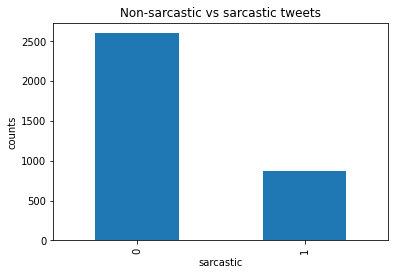

In [189]:
semeval_sarcastic_ax=semeval['sarcastic'].value_counts().plot(kind='bar', title='Non-sarcastic vs sarcastic tweets')
semeval_sarcastic_ax.set_xlabel('sarcastic')
semeval_sarcastic_ax.set_ylabel('counts')
plt.show()

####Subclassification out of the sarcastic ones

In [190]:
semeval['sarcastic'].value_counts()

0    2601
1     867
Name: sarcastic, dtype: int64

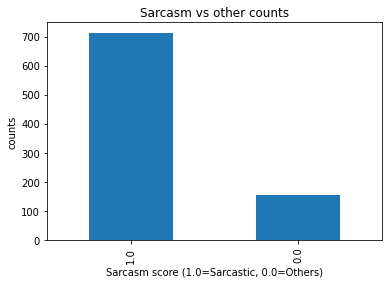

In [191]:
semeval_sarcasm_ax=semeval['sarcasm'].value_counts().plot(kind='bar', title='Sarcasm vs other counts')
semeval_sarcasm_ax.set_xlabel('Sarcasm score (1.0=Sarcastic, 0.0=Others)')
semeval_sarcasm_ax.set_ylabel('counts')
plt.show()

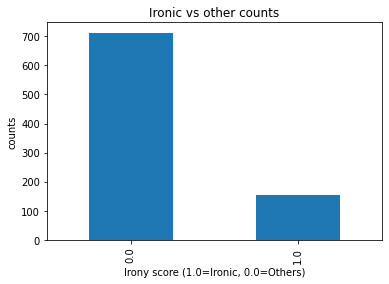

In [192]:
semeval_irony_ax=semeval['irony'].value_counts().plot(kind='bar', title='Ironic vs other counts')
semeval_irony_ax.set_xlabel('Irony score (1.0=Ironic, 0.0=Others)')
semeval_irony_ax.set_ylabel('counts')
plt.show()

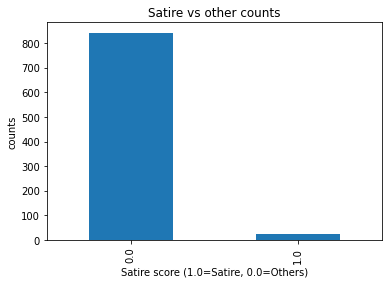

In [193]:
semeval_satire_ax=semeval['satire'].value_counts().plot(kind='bar', title='Satire vs other counts')
semeval_satire_ax.set_xlabel('Satire score (1.0=Satire, 0.0=Others)')
semeval_satire_ax.set_ylabel('counts')
plt.show()

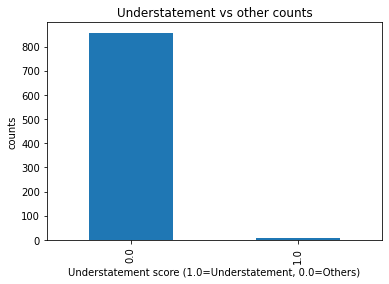

In [194]:
semeval_understatement_ax=semeval['understatement'].value_counts().plot(kind='bar', title='Understatement vs other counts')
semeval_understatement_ax.set_xlabel('Understatement score (1.0=Understatement, 0.0=Others)')
semeval_understatement_ax.set_ylabel('counts')
plt.show()

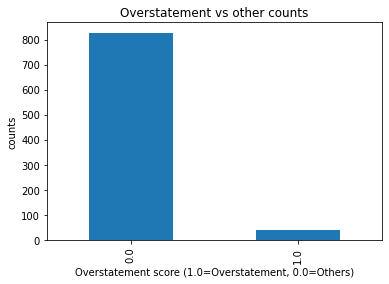

In [195]:
semeval_overstatement_ax=semeval['overstatement'].value_counts().plot(kind='bar', title='Overstatement vs other counts')
semeval_overstatement_ax.set_xlabel('Overstatement score (1.0=Overstatement, 0.0=Others)')
semeval_overstatement_ax.set_ylabel('counts')
plt.show()

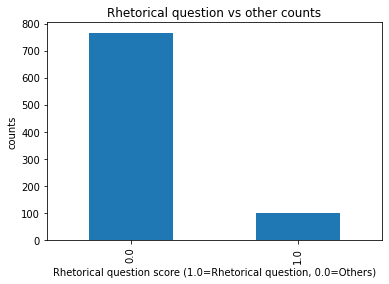

In [196]:
semeval_rhetorical_question_ax=semeval['rhetorical_question'].value_counts().plot(kind='bar', title='Rhetorical question vs other counts')
semeval_rhetorical_question_ax.set_xlabel('Rhetorical question score (1.0=Rhetorical question, 0.0=Others)')
semeval_rhetorical_question_ax.set_ylabel('counts')
plt.show()

###Tweet_emotions Dataset

In [197]:
tweet['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

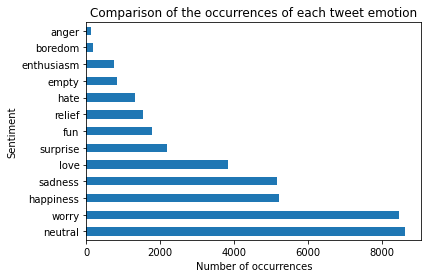

In [198]:
tweet_ax=tweet['sentiment'].value_counts().plot(kind='barh', title='Comparison of the occurrences\
 of each tweet emotion')
tweet_ax.set_ylabel('Sentiment')
tweet_ax.set_xlabel('Number of occurrences')
plt.show()

###Liar Dataset

Column 1: the ID of the statement ([ID].json). Column 2: the label. Column 3: the statement. Column 4: the subject(s). Column 5: the speaker. Column 6: the speaker's job title. Column 7: the state info. Column 8: the party affiliation. Column 9-13: the total credit history count, including the current statement. 9: barely true counts. 10: false counts. 11: half true counts. 12: mostly true counts. 13: pants on fire counts. Column 14: the context (venue / location of the speech or statement).

In [199]:
liar.columns

Index(['2635.json', 'false',
       'Says the Annies List political group supports third-trimester abortions on demand.',
       'abortion', 'dwayne-bohac', 'State representative', 'Texas',
       'republican', '0', '1', '0.1', '0.2', '0.3', 'a mailer'],
      dtype='object')

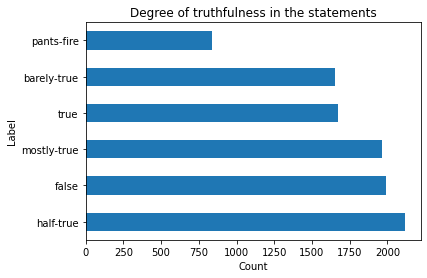

In [200]:
liar_ax=liar['false'].value_counts().head(10).plot(kind='barh', title='Degree of truthfulness in the statements')
liar_ax.set_ylabel('Label')
liar_ax.set_xlabel('Count')
plt.show()

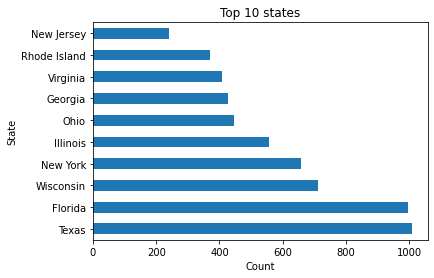

In [201]:
liar_state_ax=liar['Texas'].value_counts().head(10).plot(kind='barh', title='Top 10 states')
liar_state_ax.set_ylabel('State')
liar_state_ax.set_xlabel('Count')
plt.show()

In [202]:
liar['Texas'].value_counts().head(10)

Texas           1008
Florida          997
Wisconsin        713
New York         657
Illinois         556
Ohio             447
Georgia          426
Virginia         407
Rhode Island     369
New Jersey       241
Name: Texas, dtype: int64

In [203]:
liar['dwayne-bohac'].value_counts().head(10)

barack-obama       488
donald-trump       273
hillary-clinton    239
mitt-romney        176
scott-walker       149
john-mccain        148
rick-perry         142
chain-email        142
marco-rubio        117
rick-scott         115
Name: dwayne-bohac, dtype: int64

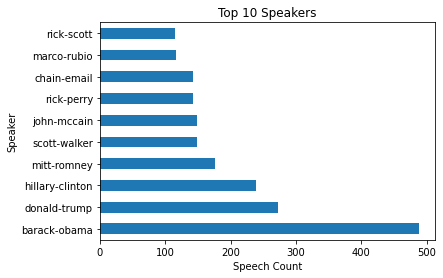

In [204]:
liar_speaker_ax=liar['dwayne-bohac'].value_counts().head(10).plot(kind='barh', title='Top 10 Speakers')
liar_speaker_ax.set_ylabel('Speaker')
liar_speaker_ax.set_xlabel('Speech Count')
plt.show()

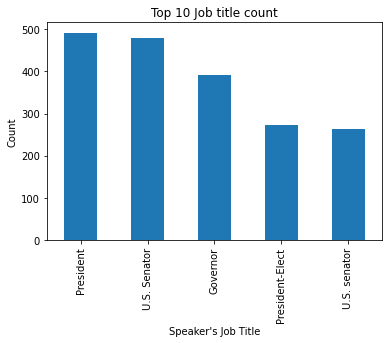

In [205]:
liar_jobtitle_ax=liar['State representative'].value_counts().head(5).plot(kind='bar', title='Top 10 Job title count')
liar_jobtitle_ax.set_ylabel('Count')
liar_jobtitle_ax.set_xlabel("Speaker's Job Title")
plt.show()

In [206]:
liar['State representative'].value_counts().head(5)
#1 for state rep

President          492
U.S. Senator       479
Governor           391
President-Elect    273
U.S. senator       263
Name: State representative, dtype: int64

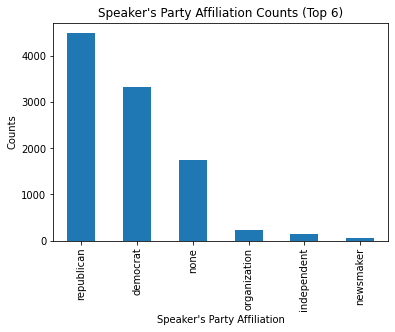

In [207]:
liar_partyaffiliation_ax=liar['republican'].value_counts().head(6).plot(kind='ba\
r', title="Speaker's Party Affiliation Counts (Top 6)")
liar_partyaffiliation_ax.set_xlabel("Speaker's Party Affiliation")
liar_partyaffiliation_ax.set_ylabel("Counts")
plt.show()

In [208]:
liar['abortion'].value_counts().head(5)

health-care    381
taxes          308
immigration    253
elections      252
education      237
Name: abortion, dtype: int64

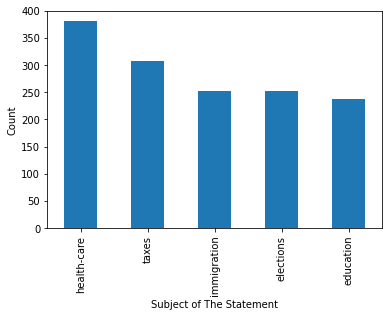

In [209]:
liar_subject_ax=liar['abortion'].value_counts().head(5).plot(kind='bar')
liar_subject_ax.set_xlabel('Subject of The Statement')
liar_subject_ax.set_ylabel('Count')
plt.show()

##Features Relationship

###Semeval Dataset

In [210]:
semeval.columns

Index(['Unnamed: 0', 'tweet', 'sarcastic', 'rephrase', 'sarcasm', 'irony',
       'satire', 'understatement', 'overstatement', 'rhetorical_question'],
      dtype='object')

In [211]:
semeval_correlation=semeval[['sarcastic', 'sarcasm', 'irony', 'satire', 'understatement', 'overstatement', 'rhetorical_question']].corr()
semeval_correlation

,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
sarcastic,1.0,NaN,NaN,NaN,NaN,NaN,NaN
sarcasm,NaN,1.000000,-0.996070,0.007946,-0.062851,-0.027261,0.027656
irony,NaN,-0.996070,1.000000,-0.008444,0.062367,0.026530,-0.028679
satire,NaN,0.007946,-0.008444,1.000000,-0.018613,-0.037896,-0.062569
understatement,NaN,-0.062851,0.062367,-0.018613,1.000000,-0.023757,0.028117
overstatement,NaN,-0.027261,0.026530,-0.037896,-0.023757,1.000000,-0.079859
rhetorical_question,NaN,0.027656,-0.028679,-0.062569,0.028117,-0.079859,1.000000


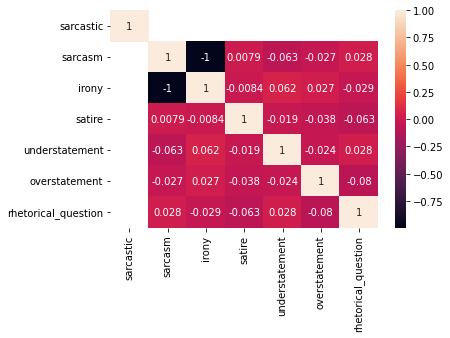

In [212]:
sns.heatmap(semeval_correlation, annot=True)
plt.show()

###Tweet_Emotions Dataset

In [213]:
tweet.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

###Liar dataset

In [214]:
liar.columns

Index(['2635.json', 'false',
       'Says the Annies List political group supports third-trimester abortions on demand.',
       'abortion', 'dwayne-bohac', 'State representative', 'Texas',
       'republican', '0', '1', '0.1', '0.2', '0.3', 'a mailer'],
      dtype='object')

In [215]:
liar_correlation=liar[['false', 'abortion', 'dwayne-bohac', 'State representative', 'Texas', 'republican', 'a mailer']].corr()
liar_correlation

""
